# Calories Burnt Prediction Project

In this project, a regression model of machine learning is trained, which takes the inputs such as `Height`,`Weight`,`Age`,`Gender` and `Duration of Exercise` and predicts the amount of calories burnt during the exercise based upon the data.

## Import required depedencies

In [1]:
# Basic Libraries required for data collection and analysis
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Specific Libraries required for modelling
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Data Collection and Processing

In [3]:
# Loading the data from the CSV files into a Pandas DataFrame
exercise=pd.read_csv("exercise.csv")
calories=pd.read_csv("calories.csv")

In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
# Combining the data into a single data frame
data= pd.concat([exercise,calories["Calories"]],axis=1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
data.shape

(15000, 9)

In [8]:
# Checking for missing(NaN) values and non-numerical entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
data.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
# Data Analysis
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Data Visualisation

<AxesSubplot:xlabel='Gender', ylabel='count'>

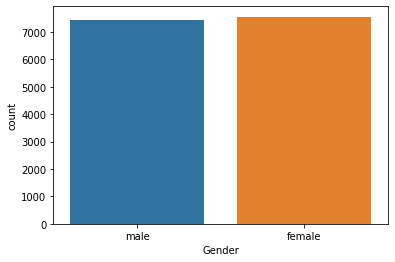

In [11]:
# Plotting the gender column in count plot
sns.countplot(x=data["Gender"])

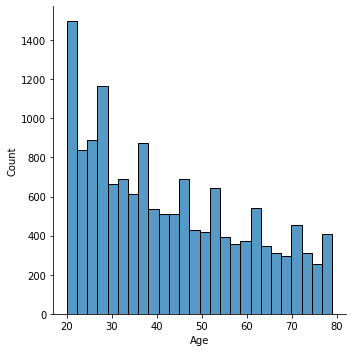

In [12]:
# Finding the distribution of the "Age" Column
sns.displot(data["Age"])

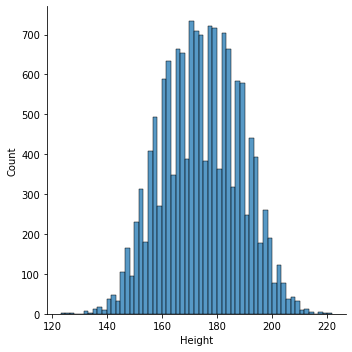

In [13]:
# Finding the distribution of the "Height" Column
sns.displot(data["Height"])

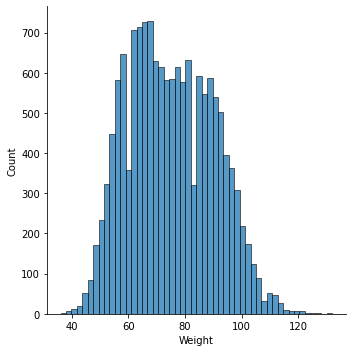

In [14]:
# Finding the distribution of the "Weight" Column
sns.displot(data["Weight"])

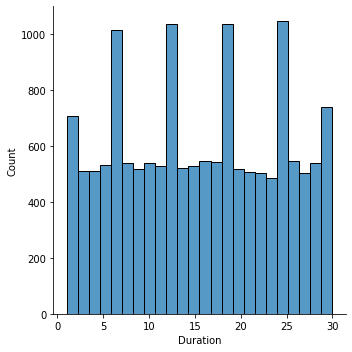

In [15]:
# Finding the distribution of the "Duration" Column
sns.displot(data["Duration"])

### Finding the Correlation in the variables

In [16]:
correlation=data.corr()
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<AxesSubplot:>

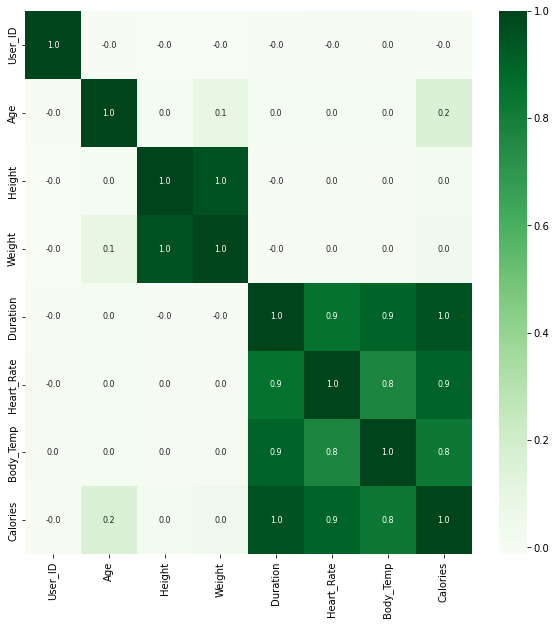

In [17]:
# Construct a heatmap to visualise the correlations
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Greens")

### Convert Categorical features into numbers

In [18]:
data.replace({
    "Gender":{
        "male":1,
        "female":0
    }},inplace=True)

In [19]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


### Seperate the features and labels

In [20]:
X= data.drop(columns=["Calories","User_ID"],axis=1)
Y= data["Calories"]

In [21]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [22]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

### Split Data into training and testing data

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

## Model Training

In [24]:
# Loading the XGBoost Regressor
model= XGBRegressor()

In [25]:
# Training the model
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Evaluating the Model

In [26]:
# Predict on the data
Y_preds=model.predict(X_test)
Y_preds

array([144.53926 , 233.9179  ,  39.156025, ...,  16.557428,  49.15185 ,
        16.724928], dtype=float32)

In [27]:
model.score(X_test,Y_test)

0.9987327591411159

In [28]:
# Mean Absolute Error
mae=metrics.mean_absolute_error(Y_test,Y_preds)
mae

1.4694813076158364

In [29]:
# Mean Squared Error
mse=metrics.mean_squared_error(Y_test,Y_preds)
mse

5.037117992519823

In [30]:
# Validating using Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,Y,scoring="r2",cv=10)

array([0.99889561, 0.99883574, 0.99885609, 0.99890867, 0.99897073,
       0.99899428, 0.99869031, 0.99902485, 0.99898518, 0.99896548])

## Saving the model into a file

In [31]:
from joblib import dump
dump(model,"Calories_model.joblib")

['Calories_model.joblib']